In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:

import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

In [4]:
%matplotlib inline

In [5]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)


In [6]:
#results

In [7]:
#print(requests.get(url))

In [8]:
#print(requests.get(url).json())

In [9]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [10]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [11]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [12]:
# Reorganizing the columns using double brackets
organized_df = health_df[["year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","education", "geolocation"]]
organized_df.head()

,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,education,geolocation
0,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [13]:
renamed_df = organized_df.rename(columns={"year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Respondents","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","education":"Education"})
renamed_df.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [14]:
Minus_NatPRGuam= renamed_df.loc[renamed_df["State"] !=("National (States and DC)", "Puerto Rico", "Guam")]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [15]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
1,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
4,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
5,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-75.57774116..."
7,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."


In [16]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
2366,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7244,1995,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [17]:
no_null_National =National.dropna(how='any')
no_null_National.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
2366,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7282,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.9,372,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [18]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
149,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
246,2005,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
287,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,American Indian/Alaska Native,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
365,1999,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
478,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [19]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
478,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
494,2003,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4,544,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
572,2005,Ohio,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.2,661,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
696,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,51.5,1339,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
831,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.2,864,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [20]:
no_null_National.dtypes

Year                object
State               object
Use Type            object
Status              object
Frequency           object
% of Respondents    object
Sample Size         object
Gender              object
Age                 object
Race                object
Education           object
geolocation         object
dtype: object

In [21]:
#no_null_State.t0 float

no_null_National[['% of Respondents']]=no_null_National[['% of Respondents']].astype(float)

C:\Users\ivlnt\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [22]:
no_null_OH[['% of Respondents']]=no_null_OH[['% of Respondents']].astype(float)

In [23]:
#state_counts = converted_df["Race"].value_counts()
#state_counts.head()
# Finding the average weight of all students
#no_null_State["% of Respondents"].mean()

In [24]:
no_null_National.dtypes

Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
geolocation          object
dtype: object

In [25]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_usa_df = no_null_National.groupby(['Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_usa_df)

# In order to be visualized, a data function must be used...
#grouped_usa_df.count()

In [26]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [27]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Respondents
Year Use Type                      Status         Frequency                       Gender  Age      Race             Education                    
1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              29.0
                                                                                  Male    All Ages All Races        High School              30.4
                                                                                  Overall All Ages African American High School              14.2
                                                                                                   All Races        High School              29.7
                                                                                                   White            High School              32.8
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School              66.0
                                                                                  Male    All Ages All Races        High School              71.0
                                                                                  Overall All Ages African American High School              65.1
                                                                                                   All Races        High School              68.6
                                                                                                   White            High School              68.8
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School              12.3
                                                                                  Male    All Ages All Races        High School              16.1
                                                                                  Overall All Ages African American High School               3.3
                                                                                                   All Races        High School              14.3
                                                                                                   White            High School              16.6
1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              32.0
                                                                                  Male    All Ages All Races        High School              36.9
                                                                                  Overall All Ages African American High School              19.6
                                                                                                   All Races        High School              34.5
                                                                                                   White            High School              38.1
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School              67.8
                                                                                  Male    All Ages All Races        High School              70.5
                                                                                  Overall All Ages African American High School              67.3
                                                                                                   All Races        High School              69.2
                                                                                                   White            High School              69.0
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School              16.4
                                         

In [28]:
grouped_usa_comparison = grouped_usa_df.mean()
grouped_usa_comparison

% of Respondents
Year Use Type                      Status         Frequency                       Gender  Age      Race                          Education                    
1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races                     High School              31.2
                                                                                  Male    All Ages All Races                     High School              29.8
                                                                                  Overall All Ages African American              High School              15.4
                                                                                                   All Races                     High School              30.5
                                                                                                   American Indian/Alaska Native High School              35.8
                                                                                                   Asian                         High School              20.5
                                                                                                   Hispanic                      High School              28.7
                                                                                                   White                         High School              33.7
                                                  Ever Cigarette Smoker           Female  All Ages All Races                     High School              68.7
                                                                                  Male    All Ages All Races                     High School              70.1
                                                                                  Overall All Ages African American              High School              67.1
                                                                                                   All Races                     High School              69.5
                                                                                                   American Indian/Alaska Native High School              75.8
                                                                                                   Asian                         High School              55.7
                                                                                                   Hispanic                      High School              71.8
                                                                                                   White                         High School              70.2
                                                  Frequent Cigarette Smoker       Female  All Ages All Races                     High School              13.5
                                                                                  Male    All Ages All Races                     High School              14.0
                                                                                  Overall All Ages African American              High School               4.6
                                                                                                   All Races                     High School              13.8
                                                                                                   American Indian/Alaska Native High School              23.0
                                                                                                   Asian                         High School               9.9
                                                                                                   Hispanic                      High School               7.7
                                                                                                   White                         High School              16.1
1995 Cig

In [29]:
combined_df = pd.merge(grouped_usa_comparison, grouped_OH_comparison,on=['Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])
combined_df

% of Respondents_x  \
Year Use Type                      Status         Frequency                       Gender  Age      Race             Education                         
1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School                31.2   
                                                                                  Male    All Ages All Races        High School                29.8   
                                                                                  Overall All Ages African American High School                15.4   
                                                                                                   All Races        High School                30.5   
                                                                                                   White            High School                33.7   
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School                68.7   
                                                                                  Male    All Ages All Races        High School                70.1   
                                                                                  Overall All Ages African American High School                67.1   
                                                                                                   All Races        High School                69.5   
                                                                                                   White            High School                70.2   
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School                13.5   
                                                                                  Male    All Ages All Races        High School                14.0   
                                                                                  Overall All Ages African American High School                 4.6   
                                                                                                   All Races        High School                13.8   
                                                                                                   White            High School                16.1   
1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School                34.7   
                                                                                  Male    All Ages All Races        High School                37.7   
                                                                                  Overall All Ages African American High School                22.7   
                                                                                                   All Races        High School                36.4   
                                                                                                   White            High School                39.7   
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School                69.3   
                                                                                  Male    All Ages All Races        High School                70.9   
                                                                                  Overall All Ages African American High School                68.4   
                                                                                                   All Races        High School                70.2   
                                                                                                   White            High School                70.4   
                                                  Fr

In [30]:

combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})

combined_df

% of USA  \
Year Use Type                      Status         Frequency                       Gender  Age      Race             Education               
1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School      31.2   
                                                                                  Male    All Ages All Races        High School      29.8   
                                                                                  Overall All Ages African American High School      15.4   
                                                                                                   All Races        High School      30.5   
                                                                                                   White            High School      33.7   
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School      68.7   
                                                                                  Male    All Ages All Races        High School      70.1   
                                                                                  Overall All Ages African American High School      67.1   
                                                                                                   All Races        High School      69.5   
                                                                                                   White            High School      70.2   
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School      13.5   
                                                                                  Male    All Ages All Races        High School      14.0   
                                                                                  Overall All Ages African American High School       4.6   
                                                                                                   All Races        High School      13.8   
                                                                                                   White            High School      16.1   
1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School      34.7   
                                                                                  Male    All Ages All Races        High School      37.7   
                                                                                  Overall All Ages African American High School      22.7   
                                                                                                   All Races        High School      36.4   
                                                                                                   White            High School      39.7   
                                                  Ever Cigarette Smoker           Female  All Ages All Races        High School      69.3   
                                                                                  Male    All Ages All Races        High School      70.9   
                                                                                  Overall All Ages African American High School      68.4   
                                                                                                   All Races        High School      70.2   
                                                                                                   White            High School      70.4   
                                                  Frequent Cigarette Smoker       Female  All Ages All Races        High School      15.7   
                                                                                  Male    All Ages All Races        High School      17.6   
                                        

In [39]:
#drop ever and frequent users in "frequency" column

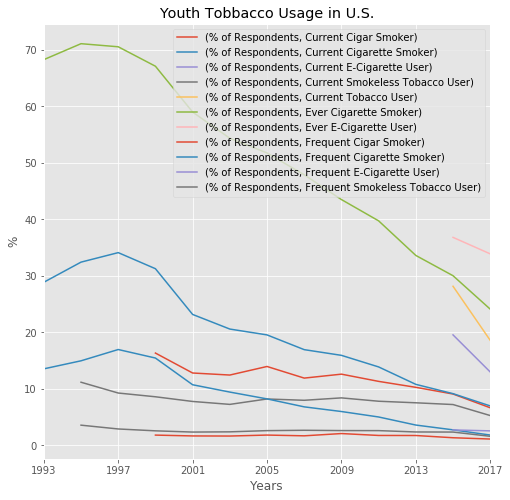

In [35]:
USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)
smoking_by_type = USA.groupby(['Year','Frequency']).mean()
fig, ax = plt.subplots(figsize=(8,8))
smoking_by_type.unstack().plot(ax=ax)
plt.title("Youth Tobbacco Usage in U.S.")
plt.xlabel("Years")
plt.ylabel("%")
leg = ax.legend()
